In [1]:
import os
import sys

In [66]:
os.environ['MUJOCO_GL'] = 'egl'

In [115]:
import time

from absl import app
from absl import flags
from dm_control.suite import humanoid_CMU
from dm_control.suite.utils import parse_amc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
%matplotlib inline

In [150]:
env = humanoid_CMU.stand()

In [155]:
converted = parse_amc.convert('/srv/data/ltcl/data/all_asfamc/subjects/07/07_04.amc',
                                env.physics, env.control_timestep())

In [159]:
np.unique(env.physics.render(height, width, camera_id=camera_id, segmentation=True)[:,:,0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int32)

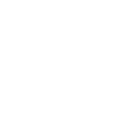

In [156]:
max_frame = min(10000, converted.qpos.shape[1] - 1)
camera_id = 2
width = 256
height = 256
video = np.zeros((max_frame, height, width, 3), dtype=np.uint8)

for i in range(max_frame):
    p_i = converted.qpos[:, i]
    with env.physics.reset_context():
        env.physics.data.qpos[:] = p_i
    mask = env.physics.render(height, width, camera_id=camera_id, segmentation=True)[:,:,0] == 0
    image = env.physics.render(height, width, camera_id=camera_id)
    image[mask] = 255
    video[i] = np.rot90(image,2)
img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure(figsize=(2,2))
plt.axis('off')
for i in range(len(video)):
    frames.append([plt.imshow(video[i], cmap=cm.Greys_r,animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
# ani.save('movie.mp4')

In [162]:
data = converted.qpos.T

In [164]:
data.shape

(187, 63)

In [163]:
data

array([[ 0.46564832,  1.7572767 ,  0.91715856, ...,  0.12435506,
        -1.0208745 , -0.05273739],
       [ 0.46415927,  1.74286987,  0.91808501, ...,  0.12435506,
        -1.04840919, -0.02899181],
       [ 0.4628018 ,  1.72957567,  0.91826578, ...,  0.12435506,
        -0.93332609, -0.03472086],
       ...,
       [ 0.6490654 , -1.66283453,  0.99726503, ...,  0.12435506,
        -1.14501377,  0.00526078],
       [ 0.65021795, -1.67775274,  0.99615193, ...,  0.12435506,
        -1.14477193,  0.01557102],
       [ 0.65112046, -1.69455124,  0.99373005, ...,  0.12435506,
        -0.96427186, -0.03610674]])

In [157]:
HTML(ani.to_html5_video())

In [ ]:
1, -2
-1, 2